In [1]:
import pandas as pd 
import datetime
import seaborn as sns

import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("games.csv")
data.shape

(20058, 16)

In [3]:
# Verifying if the times are all correct
current_timestamp = datetime.datetime.now().timestamp()
count_CAt , count_LMAt =  0  , 0
for col in ['created_at', 'last_move_at']:
    for index, value in data[col].iteritems():
        if value/1000 < 0 or value/ 1000 > current_timestamp:
            if col == 'created_at' : count_CAt +=1
            else : count_LMAt += 1

count_CAt , count_LMAt 
# Both 0 , so no value is neither negative nor superior to the current date, which is correct. 

AttributeError: 'Series' object has no attribute 'iteritems'

In [4]:
# Translating to seconds instead of mi
data['created_at'] = data['created_at']/1000
data['last_move_at'] = data['last_move_at']/1000

In [5]:
# Define a function to convert Unix timestamp to datetime object
def convert_unix_to_datetime(timestamp):
    current_timestamp = datetime.datetime.now().timestamp()

    return datetime.datetime.utcfromtimestamp(timestamp) if timestamp > 0 and timestamp < current_timestamp else None

# Apply the function to create new columns with human-readable date and time
data['created_at_datetime'] = data['created_at'].apply(convert_unix_to_datetime)
data['last_move_at_datetime'] = data['last_move_at'].apply(convert_unix_to_datetime)

# IMPORTANT : Many instances had same timing for start and end of game, which is because it was not precise enough. This means that some 
# game times data will be corrupted, and not usable for visualisation. 
# We can make this part of our visualition , maybe ? Not sure if it goes with the aim of the project or not 

C:\Users\wacim\AppData\Local\Temp\ipykernel_10804\1791255219.py:5: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return datetime.datetime.utcfromtimestamp(timestamp) if timestamp > 0 and timestamp < current_timestamp else None
C:\Users\wacim\AppData\Local\Temp\ipykernel_10804\1791255219.py:5: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return datetime.datetime.utcfromtimestamp(timestamp) if timestamp > 0 and timestamp < current_timestamp else None


In [6]:
data['rating_diff'] = data['white_rating'] - data['black_rating']
data['rating_diff_abs'] = data['rating_diff'].abs()

In [7]:
data['rating_diff_abs']

0        309
1         61
2          4
3         15
4         54
        ... 
20053    471
20054     37
20055     67
20056    133
20057    104
Name: rating_diff_abs, Length: 20058, dtype: int64

In [8]:
print("The maximum rating difference is : " , data['rating_diff_abs'].max())
print("The minimum rating difference is : " , data['rating_diff_abs'].min())

The maximum rating difference is :  1605
The minimum rating difference is :  0


In [9]:
# Drop the pseudo columns because not interesting for our study, no insights can be extracted from them. 
del data['white_id']
del data['black_id']

In [10]:
def plot_percentages(df , column , labels = None , title = "") : 
    # Count the number of rated and unrated games
    counts = data[column].value_counts()

    if labels == None : 
        plot_labels = counts.index
    else : plot_labels = labels
    
    # Plot the pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(counts, labels=plot_labels, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.show()

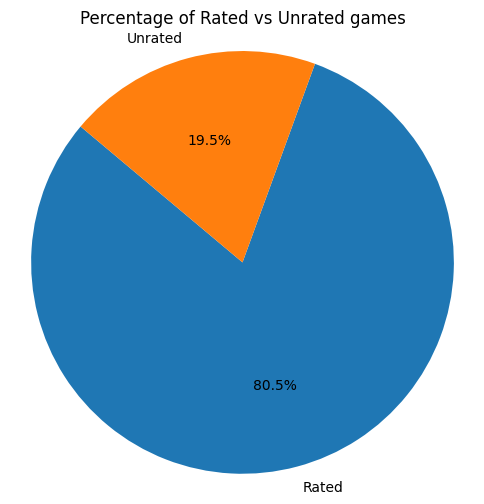

In [11]:
plot_percentages(data , 'rated' , labels = ["Rated" , "Unrated"] , title = "Percentage of Rated vs Unrated games")

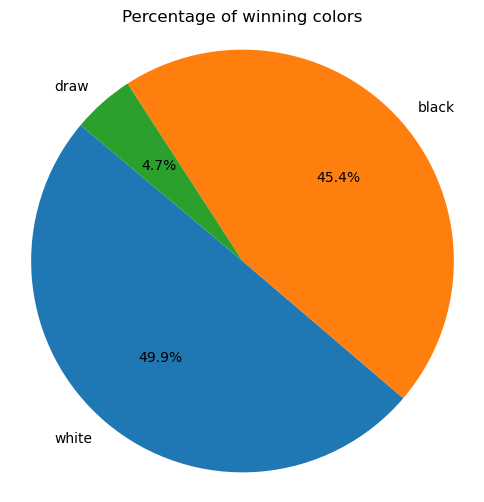

In [ ]:
plot_percentages(data , 'winner' , labels = None , title = "Percentage of winning colors")

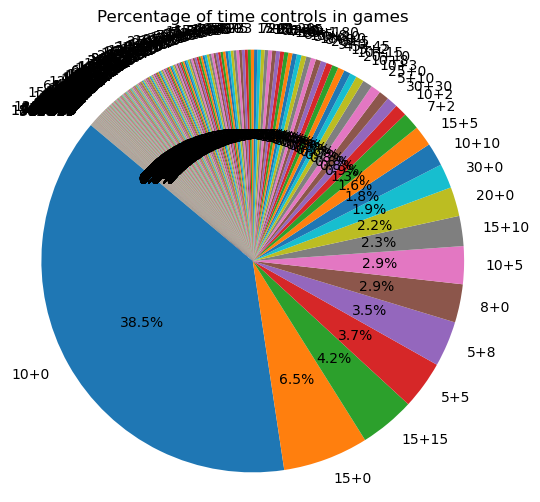

In [ ]:
plot_percentages(data , 'increment_code' , None , title = "Percentage of time controls in games")

We can see that the majority of games are 10+0 games, it could make sense because of the following point : this is the best timing control to learn chess, so beginners tend to play 10+0 games. First we want to verify what is the distribution of ratings in our data :  

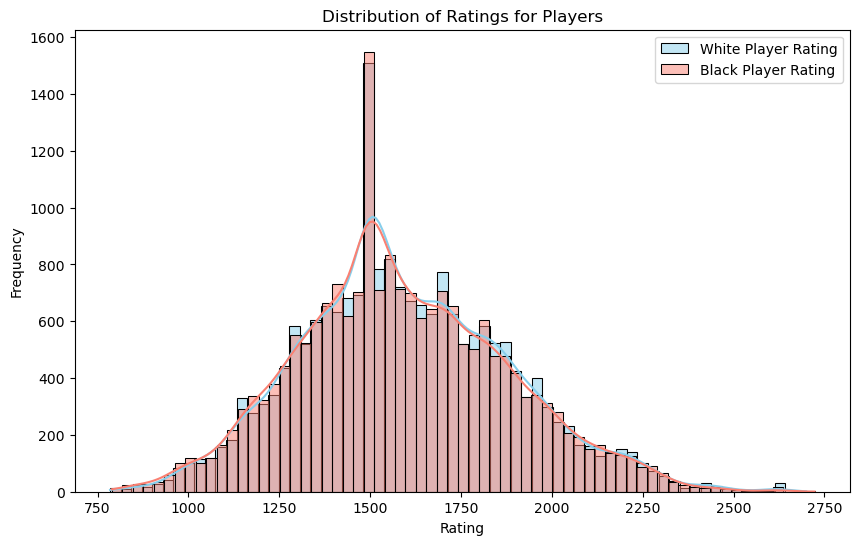

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['white_rating'], kde=True, color='skyblue', label='White Player Rating')
sns.histplot(data['black_rating'], kde=True, color='salmon', label='Black Player Rating')
plt.title('Distribution of Ratings for Players')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.legend()
plt.show()

From the previous plot, there is a poor amount of beginners playing games from the dataset, so it is a bit hard to verify the previous asumption with our data. On top of that, it is totally possible that certain players were counted multiple times, because they played multiple games in our dataset. Further pre-processing is needed to verify those assumptions. 

In [12]:
df_10plus0 = data[data['increment_code'] == '10+0']

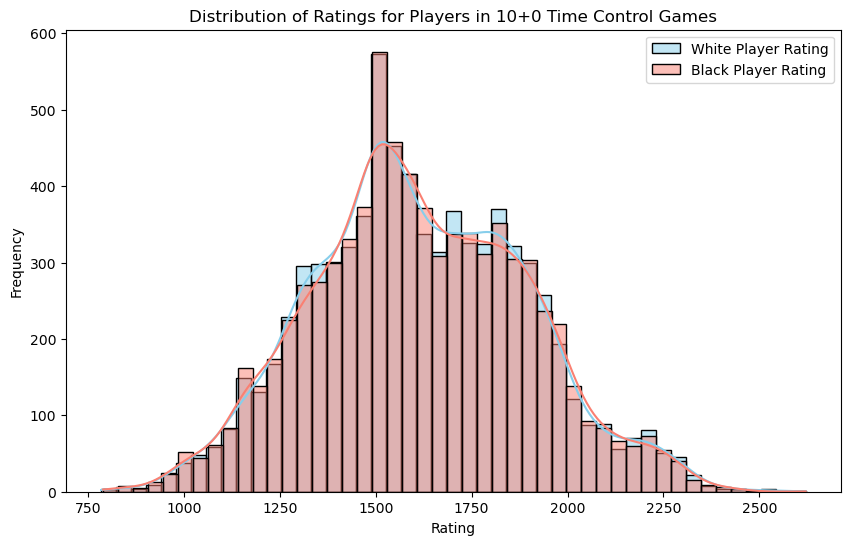

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_10plus0['white_rating'], kde=True, color='skyblue', label='White Player Rating')
sns.histplot(df_10plus0['black_rating'], kde=True, color='salmon', label='Black Player Rating')
plt.title('Distribution of Ratings for Players in 10+0 Time Control Games')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.legend()
plt.show()

According to our data, the most played time control is played by &asymp; 1500 rated players majoritarely 

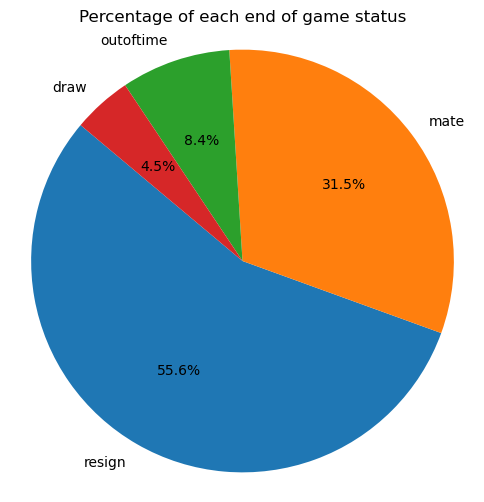

In [ ]:
plot_percentages(data , 'victory_status' , labels = None , title = "Percentage of each end of game status")

In [13]:
data['increment_code'].unique()

array(['15+2', '5+10', '20+0', '30+3', '10+0', '15+30', '15+0', '20+60',
       '5+40', '8+0', '15+15', '15+16', '11+0', '30+60', '15+5', '10+10',
       '15+3', '18+0', '30+30', '20+25', '5+5', '30+0', '40+40', '16+0',
       '6+10', '8+10', '8+12', '7+12', '15+10', '20+5', '20+10', '45+0',
       '5+8', '30+2', '25+0', '10+2', '7+2', '25+25', '7+8', '6+6',
       '10+4', '12+0', '15+1', '2+10', '9+0', '10+9', '6+7', '30+10',
       '30+15', '10+3', '45+30', '9+2', '7+3', '6+5', '25+5', '5+7',
       '8+2', '20+8', '30+5', '25+15', '15+7', '8+8', '5+9', '16+7',
       '10+7', '7+5', '40+20', '10+5', '11+5', '10+15', '180+0', '17+5',
       '8+5', '3+8', '60+120', '90+120', '15+8', '9+1', '9+3', '2+15',
       '10+1', '5+12', '60+10', '5+60', '8+15', '30+25', '12+1', '14+0',
       '60+20', '10+8', '20+3', '14+12', '7+7', '60+0', '45+45', '4+15',
       '5+6', '180+180', '8+3', '4+6', '10+25', '3+10', '7+4', '6+3',
       '5+15', '45+15', '15+20', '6+8', '6+9', '14+8', '6+4', '15+4',
 

In [14]:
data[['initial_time', 'increment']] = data['increment_code'].str.split('+', expand=True)

# Convert the columns to numeric type if needed
data['initial_time'] = pd.to_numeric(data['initial_time'])
data['increment'] = pd.to_numeric(data['increment'])

In [15]:
def categorize_time_control(initial_time):
    if initial_time < 3:
        return 'Bullet'
    elif initial_time < 10:
        return 'Blitz'
    elif initial_time < 30:
        return 'Rapid'
    else:
        return 'Other'

# Apply the categorize_time_control function to create a new column
data['time_control_category'] = data['initial_time'].apply(categorize_time_control)



In [16]:
def boolean_increment(increment): 
    if increment == 0 : 
        return False
    return True

data['increment_boolean'] = data['increment'].apply(boolean_increment)


In [ ]:
data.shape

(20058, 22)

In [17]:
data = data.drop_duplicates().dropna()
data.shape

(19629, 22)

In [18]:
# Set both 'created_at' and 'last' columns to -1 where they are the same
data.loc[data['created_at_datetime'] == data['last_move_at_datetime'], ['created_at_datetime', 'last_move_at_datetime']] = -1

C:\Users\wacim\AppData\Local\Temp\ipykernel_10804\1729699205.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  data.loc[data['created_at_datetime'] == data['last_move_at_datetime'], ['created_at_datetime', 'last_move_at_datetime']] = -1
C:\Users\wacim\AppData\Local\Temp\ipykernel_10804\1729699205.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  data.loc[data['created_at_datetime'] == data['last_move_at_datetime'], ['created_at_datetime', 'last_move_at_datetime']] = -1


In [19]:
len(data[data['created_at_datetime'] != -1])

11096

In [20]:
del data['created_at']
del data['last_move_at']
del data['increment_code']

In [21]:
data.to_csv('games_revisited.csv', index=False)


In [22]:
def filter_data(df, category, increment, rating, color):
    # Determine the lower and upper bounds of the rating range
    lower_bound = rating - 100
    upper_bound = rating + 100

    # Filter the DataFrame based on the conditions
    filtered_df = df[(df['time_control_category'] == category) & 
                     (df['increment_boolean'] == increment) & 
                     ((df['white_rating'] + df['black_rating']) / 2 >= lower_bound) & 
                     ((df['white_rating'] + df['black_rating']) / 2 <= upper_bound) &
                     (df['winner'] == color.lower())]       # Could need to adapt the rating filter ... 

    return filtered_df


In [23]:
filtered = filter_data(data , "Blitz" , 0 , 1200 , "black")

In [24]:
top5 = filtered.groupby('opening_name')['winner'].count().nlargest(5)

In [25]:
top5

opening_name
French Defense: King's Indian Attack                2
Sicilian Defense: Nyezhmetdinov-Rossolimo Attack    2
Barnes Defense                                      1
Benoni Defense: Hromadka System                     1
Bishop's Opening                                    1
Name: winner, dtype: int64

In [26]:
top5.columns

AttributeError: 'Series' object has no attribute 'columns'

In [27]:
data = pd.Series([30, 20, 50], index=['A', 'B', 'C'])


In [28]:
data

A    30
B    20
C    50
dtype: int64

In [30]:
def load_data():
    df = pd.read_csv("games_revisited.csv")
    return df

# Function to filter the dataset based on user inputs
def filter_data(df, category, increment, rating, color):
    # Determine the lower and upper bounds of the rating range
    lower_bound = rating - 100
    upper_bound = rating + 100

    # Filter the DataFrame based on the conditions
    filtered_df = df[(df['time_control_category'] == category) & 
                     (df['increment_boolean'] == increment) & 
                     ((df['white_rating'] + df['black_rating']) / 2 >= lower_bound) & 
                     ((df['white_rating'] + df['black_rating']) / 2 <= upper_bound) &
                     (df['winner'] == color.lower())]       # Could need to adapt the rating filter ... 

    return filtered_df

# Function to plot the top 5 openings and their first moves
def plot_top_openings(df):
    top_openings = df.groupby('opening_name')['winner'].count().nlargest(2).reset_index()
    #top_opening_moves = df[df['opening_name'].isin(top_openings.index)]
    top_openings.columns = ['opening_name', 'wins']
    fig = px.bar(top_openings, x='opening_name', y='wins', title='Opening Usage Frequency')
    return fig